In [1]:
# Problem Statement
# Use Random Forest to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [131]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
data=pd.read_csv('Fraud_check.csv')

In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

In [6]:
data.shape

(600, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [8]:
data[data.duplicated()] # no duplicates

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [9]:
# converting data type
data.insert(6,'tax_class',str)

In [10]:
data.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,<class 'str'>


In [11]:
for i in range(0,len(data['Taxable.Income']),1):       #range(start,stop,step)
    if data['Taxable.Income'].iloc[i]<=30000:
        data['tax_class'].iloc[i]='Risky'
    else:
        data['tax_class'].iloc[i]='Good'

C:\Users\sycmy\AppData\Local\Temp\ipykernel_11896\122984614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tax_class'].iloc[i]='Good'
C:\Users\sycmy\AppData\Local\Temp\ipykernel_11896\122984614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tax_class'].iloc[i]='Risky'


In [12]:
data.head(15)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [14]:
# dropping Taxable.Income column
data1=data.drop('Taxable.Income',axis=1)
data1.head(1)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good


In [17]:
# Label Encoding
label_encoder=preprocessing.LabelEncoder()
data1['Undergrad']=label_encoder.fit_transform(data1['Undergrad'])
data1['Marital.Status']=label_encoder.fit_transform(data1['Marital.Status'])
data1['Urban']=label_encoder.fit_transform(data1['Urban'])
data1['tax_class']=label_encoder.fit_transform(data1['tax_class'])

In [18]:
data1.head(15)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
5,0,0,116382,0,0,0
6,0,0,80890,8,1,0
7,1,2,131253,3,1,0
8,0,2,102481,12,1,0
9,1,0,155482,4,1,0


In [19]:
data1.info()    # no missing values
                # data types converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   tax_class        600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [20]:
data1.describe()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,199778.000000,30.000000,1.000000,1.000000


In [21]:
cor=data1.corr()
cor

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
tax_class,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


## Visualization

<Axes: >

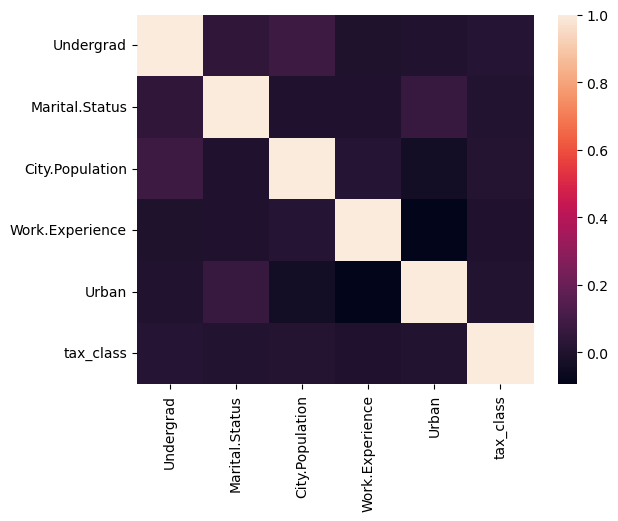

In [22]:
sns.heatmap(cor)

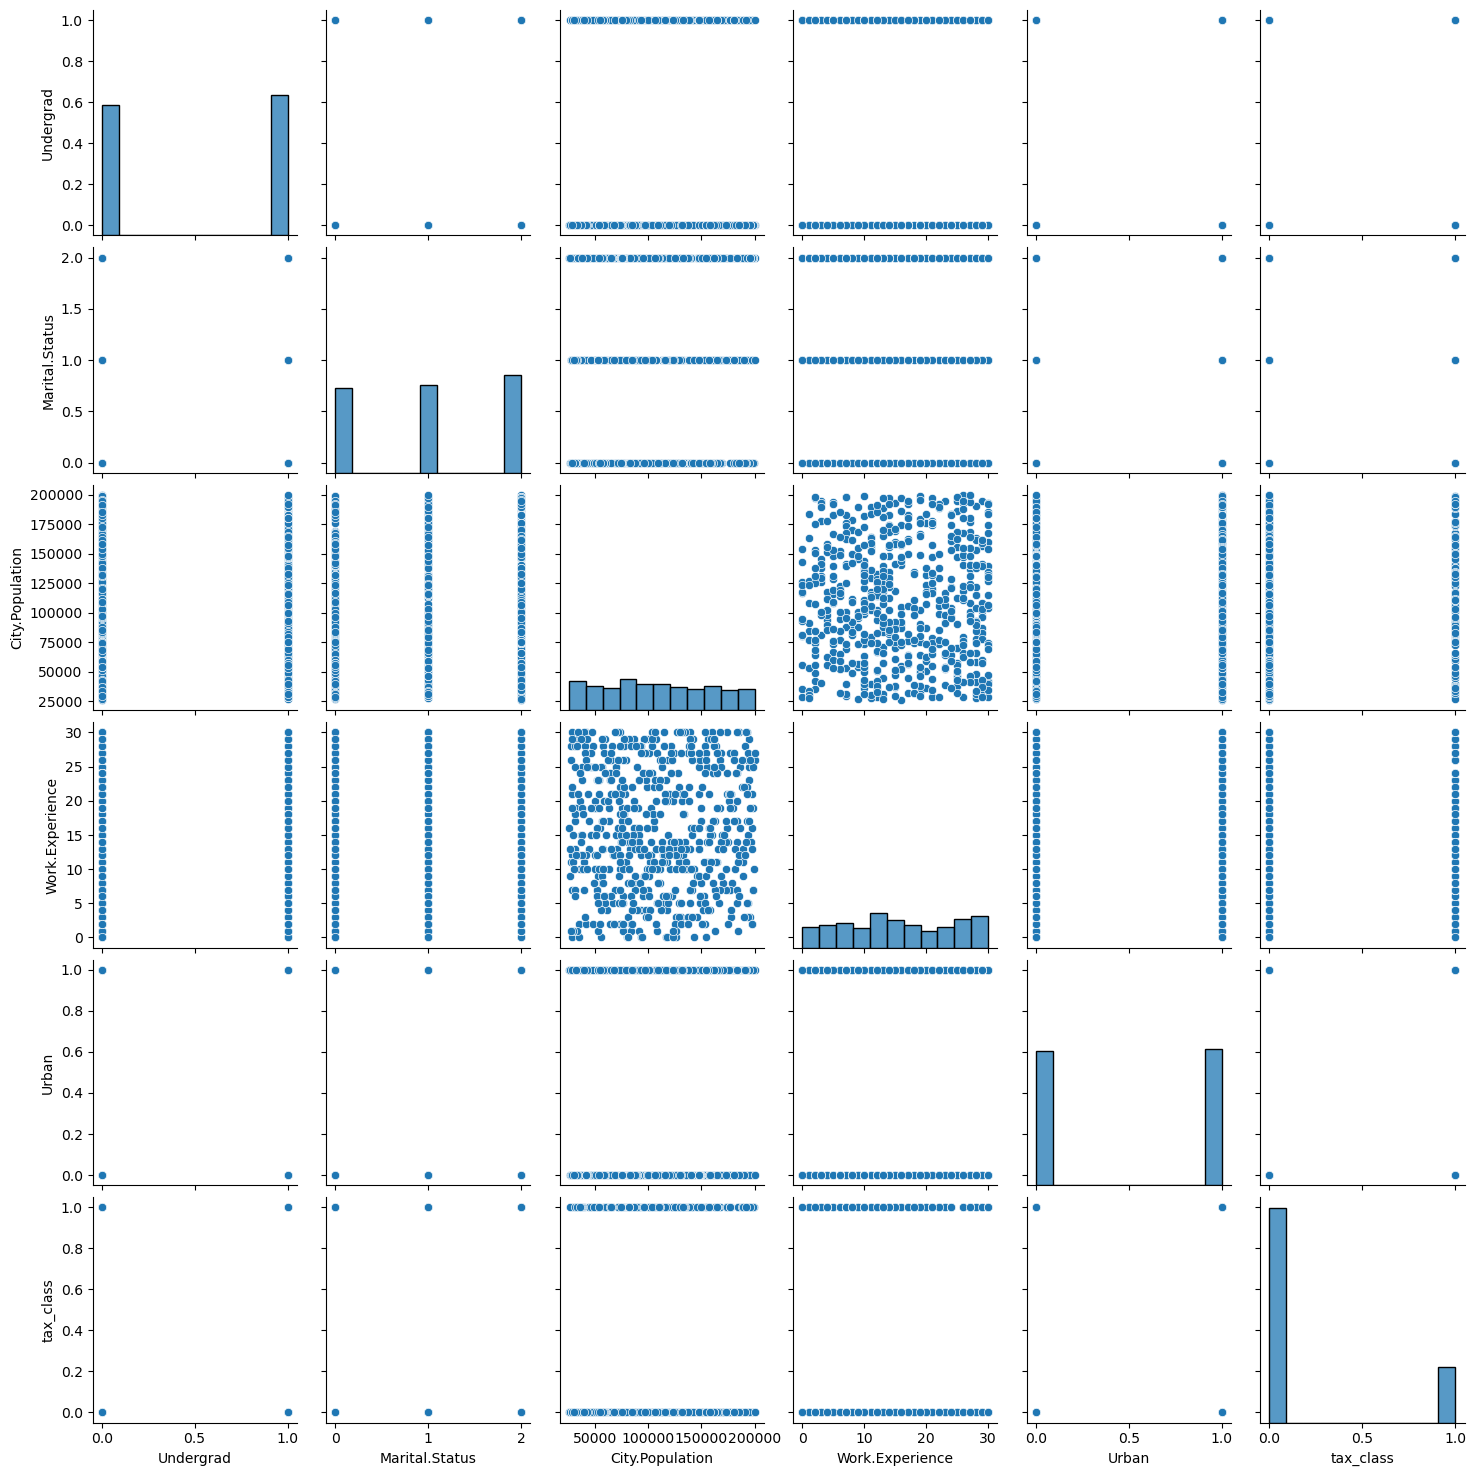

In [23]:
sns.pairplot(data1)

## Building Model

In [24]:
x=data1.iloc[:,:5]
y=data1.iloc[:,5:]

In [25]:
x.head(1)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1


In [26]:
y.head(1)

,tax_class
0,0


In [27]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)    # splitting data

## Random Forest Classifier

In [94]:
model_rfc=RandomForestClassifier(n_estimators=1000,criterion='gini',max_depth=9)
model_rfc.fit(x_train,y_train)

C:\Users\sycmy\AppData\Local\Temp\ipykernel_11896\738556549.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=9, n_estimators=1000)

In [95]:
# Prediction on training data
y_pred_train=model_rfc.predict(x_train)
pd.Series(y_pred_train).value_counts() 

0    422
1     58
dtype: int64

In [96]:
y_train.value_counts() 

tax_class
0            382
1             98
dtype: int64

In [97]:
# accuracy : training data
accuracy_score(y_train,y_pred_train)

0.9166666666666666

In [98]:
# Predicting on validation data
y_pred_val=model_rfc.predict(x_val)
pd.Series(y_pred_val).value_counts()

0    119
1      1
dtype: int64

In [99]:
y_val.value_counts()

tax_class
0            94
1            26
dtype: int64

In [100]:
# accuracy : validation data
accuracy_score(y_val,y_pred_val) 

0.775

## Bagging

In [103]:
model_bagging=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=700,random_state=7)
model_bagging.fit(x_train,y_train)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=700,
                  random_state=7)

In [108]:
# Prediction on training data
y_pred_train2=model_bagging.predict(x_train)
pd.Series(y_pred_train2).value_counts() 

0    382
1     98
dtype: int64

In [109]:
# accuracy : training data
accuracy_score(y_train,y_pred_train2)

1.0

In [110]:
# Predicting on validation data
y_pred_val2=model_bagging.predict(x_val)
pd.Series(y_pred_val2).value_counts()

0    113
1      7
dtype: int64

In [112]:
# accuracy : validation data
accuracy_score(y_val,y_pred_val2) 

0.725

## Boosting

In [113]:
model_boosting=AdaBoostClassifier(n_estimators=10,random_state=7)
model_boosting.fit(x_train,y_train)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=10, random_state=7)

In [120]:
# Prediction on training data
y_pred_train3=model_boosting.predict(x_train)
pd.Series(y_pred_train3).value_counts() 

0    480
dtype: int64

In [122]:
# accuracy : training data
accuracy_score(y_train,y_pred_train3)

0.7958333333333333

In [117]:
# Predicting on validation data
y_pred_val3=model_boosting.predict(x_val)
pd.Series(y_pred_val3).value_counts()

0    120
dtype: int64

In [119]:
# accuracy : validation data
accuracy_score(y_val,y_pred_val3) 

0.7833333333333333

## Stacking

In [123]:
estimators=[]
model1=LogisticRegression()
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))


model_stacking=VotingClassifier(estimators)
model_stacking.fit(x_train,y_train)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [124]:
# Prediction on training data
y_pred_train4=model_stacking.predict(x_train)
pd.Series(y_pred_train4).value_counts() 

0    480
dtype: int64

In [126]:
# accuracy : training data
accuracy_score(y_train,y_pred_train4)

0.7958333333333333

In [127]:
# Predicting on validation data
y_pred_val4=model_stacking.predict(x_val)
pd.Series(y_pred_val4).value_counts()

0    120
dtype: int64

In [129]:
# accuracy : validation data
accuracy_score(y_val,y_pred_val4) 

0.7833333333333333

## XGBM

In [133]:
from xgboost import XGBClassifier

In [134]:
model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [135]:
# Prediction on training data
y_pred_train5=model_xgb.predict(x_train)
pd.Series(y_pred_train5).value_counts()

0    382
1     98
dtype: int64

In [138]:
# accuracy : training data
accuracy_score(y_train,y_pred_train5)

1.0

In [139]:
# Predicting on validation data
y_pred_val5=model_stacking.predict(x_val)
pd.Series(y_pred_val5).value_counts()

0    120
dtype: int64

In [141]:
# accuracy : validation data
accuracy_score(y_val,y_pred_val5)

0.7833333333333333

## LGBM

In [143]:
import lightgbm as lgb

In [144]:
d_train = lgb.Dataset(x_train, label=y_train)

In [145]:
d_train

In [146]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'dart' 
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5 
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [147]:
params

{'learning_rate': 0.003,
 'boosting_type': 'dart',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'sub_feature': 0.5,
 'num_leaves': 10,
 'min_data': 50,
 'max_depth': 10}

In [148]:
model_lgb = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 98, number of negative: 382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204167 -> initscore=-1.360453
[LightGBM] [Info] Start training from score -1.360453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [150]:
# Prediction on training data
y_pred_train6=model_lgb.predict(x_train)

In [154]:
predictions_train=[round(value) for value in y_pred_train6]

In [155]:
# accuracy : training data
accuracy_score(y_train,predictions_train)

0.7958333333333333

In [156]:
# Predicting on validation data
y_pred_val6=model_lgb.predict(x_val)

In [159]:
predictions_val=[round(value) for value in y_pred_val6]

In [160]:
# accuracy : validation data
accuracy_score(y_val,predictions_val)

0.7833333333333333

In [161]:
# Random Forest, accuracy: train data: 0.91, val data: 0.775
# Bagging, accuracy: train data: 1.0, val data: 0.725
# Boosting, accuracy: train data: 0.795, val data: 0.78
# Stacking, accuracy: train data: 0.795, val data: 0.783
# XGBM, accuracy: train data: 1.0 , val data: 0.783
# LGBM, accuracy: train data: 0.79 , val data: 0.78

In [162]:
# Bagging and XGBM have high training accuracy which can cause overfitting.